Fonte: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# leitura do data set

df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')

In [ ]:
# exibição de 5 linhas do data set

df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# informação do tamanho do data set

df.shape

(100000, 9)

In [ ]:
# descrição do data set

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
# informações do dados contidos no data set.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# quantidade de valores por coluna

df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [ ]:
# averiguando valores NaN nas colunas

df.isna().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [ ]:
# quantidade de valores NaN por coluna

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
# descrição das colunas do data set

df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# renomeando as colunas do data set

df.columns=['genero','idade','hipertenso','doença_cardiaca','historico_fumante','IMC','HbA1c','nivel_glicose','diabetes']

In [ ]:
# renomeando os valores do data set

df = df.replace({'Female':'feminino',
            'Male':'masculino',
            'never':'nunca',
            'current':'atualmente',
            'former':'já fumou',
            'not current':'não atualmente',
            'ever':'sempre',
            'No Info':'não informado'})

In [ ]:
# contagem dos valores da coluna genero

df['genero'].value_counts()

feminino     58552
masculino    41430
Other           18
Name: genero, dtype: int64

In [ ]:
# contagem dos valores da coluna historica_fumante

df['historico_fumante'].value_counts()

não informado     35816
nunca             35095
já fumou           9352
atualmente         9286
não atualmente     6447
sempre             4004
Name: historico_fumante, dtype: int64

In [ ]:
# alterando os valores 'Other' da coluna genero para NaN para serem excluidos

df = df.replace({'Other': np.nan})

In [ ]:
# averiguando valores NaN

df.isna().any()

genero                True
idade                False
hipertenso           False
doença_cardiaca      False
historico_fumante    False
IMC                  False
HbA1c                False
nivel_glicose        False
diabetes             False
dtype: bool

In [ ]:
# somando os valores NaN

df.isna().sum()

genero               18
idade                 0
hipertenso            0
doença_cardiaca       0
historico_fumante     0
IMC                   0
HbA1c                 0
nivel_glicose         0
diabetes              0
dtype: int64

In [ ]:
# removendo valores NaN

#axis=0 remove valores vazios nas linhas
#axis=1 remove valores vazios nas colunas

#how=all remove a linha ou a coluna se todos os valores forem vazios
#how=any remove a linha ou a coluna se algum valor for vazio.

df = df.dropna(how='any', axis=0)

In [ ]:
# averiguando a quantidade de valores NaN

df.isna().sum()

genero               0
idade                0
hipertenso           0
doença_cardiaca      0
historico_fumante    0
IMC                  0
HbA1c                0
nivel_glicose        0
diabetes             0
dtype: int64

In [ ]:
# quantidade de pessoas com e sem diabetes

df['diabetes'].value_counts()

0    91482
1     8500
Name: diabetes, dtype: int64

In [ ]:
# alterando os valores 'feminino' e 'masculino' para 0 e 1 como valores numericos

df = df.replace({'feminino': 1, 'masculino': 0})

/tmp/ipykernel_20/51530927.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/tmp/ipykernel_20/51530927.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
/tmp/ipykernel_20/51530927.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silenc

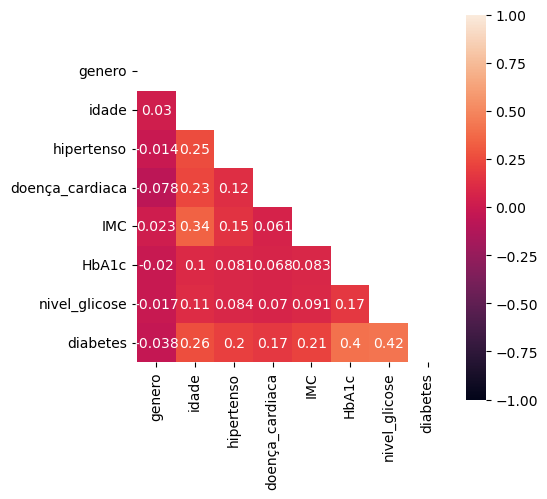

In [ ]:
# plotando grafico de Correlação de Pearson

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

plt.figure(figsize=(5,5))

sns.heatmap(df.corr(), mask=mask, square=True, annot=True, vmin=-1, vmax=1)

plt.show()

In [ ]:
# exportando novo arquivo em csv com os dados tratados

df.to_csv('dados_diabeticos_tratados.csv', index=False)
